# Dependecies

In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

sns.set_style("whitegrid")

# Load stats (Retina)

In [2]:
models_dir = "models/skinlesion"
json_files = []

for model_name in os.listdir(models_dir):
    model_dir = os.path.join(models_dir, model_name)
    if os.path.isdir(model_dir):
        stats_dir = os.path.join(model_dir, 'stats')
        if '.ipynb_checkpoints' in stats_dir:
            continue
        for file in os.listdir(stats_dir):
            if file.endswith('.json'):
                json_files.append(os.path.join(stats_dir, file))

json_files

['models/skinlesion/unet/stats/unet_16_adam_dice_loss_augmented.json',
 'models/skinlesion/unet/stats/unet_16_adam_bce_total_variation.json',
 'models/skinlesion/unet/stats/unet_16_adam_dice_loss.json',
 'models/skinlesion/unet/stats/unet_16_adam_bce_loss.json',
 'models/skinlesion/unet/stats/unet_16_adam_bce_loss_augmented.json',
 'models/skinlesion/unet/stats/unet_16_adam_bce_total_variation_augmented.json',
 'models/skinlesion/cnn/stats/cnn_16_adam_bce_loss_augmented.json',
 'models/skinlesion/cnn/stats/cnn_16_adam_bce_total_variation.json',
 'models/skinlesion/cnn/stats/cnn_16_adam_dice_loss_augmented.json',
 'models/skinlesion/cnn/stats/cnn_16_adam_bce_total_variation_augmented.json',
 'models/skinlesion/cnn/stats/cnn_16_adam_bce_loss.json',
 'models/skinlesion/cnn/stats/cnn_16_adam_dice_loss.json']

In [3]:
stats_list = []
for fname in json_files:
    with open(fname, 'r') as f:
        stats_list.append(json.load(f))

In [4]:
stats_list_cnn = [stat for stat in stats_list if stat['model'] == 'cnn']
stats_list_unet = [stat for stat in stats_list if stat['model'] == 'unet']

In [5]:
import matplotlib.cm as cm

def stat_to_setting(stat):
    if stat['loss_function'] == 'bce_total_variation':
        return 0 if stat['data_augmentation'] else 1
    elif stat['loss_function'] == 'dice_loss':
        return 2 if stat['data_augmentation'] else 3
    elif stat['loss_function'] == 'bce_loss':
        return 4 if stat['data_augmentation'] else 5
    else:
        raise ValueError(f"Unrecognized model settings: {stat}")

setting_colormap = cm.get_cmap('tab10', 6)
stat2color = lambda stat: setting_colormap(stat_to_setting(stat))

/tmp/ipykernel_197266/910064873.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  setting_colormap = cm.get_cmap('tab10', 6)


/tmp/ipykernel_197266/1948970572.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = mpl.cm.get_cmap('tab10')


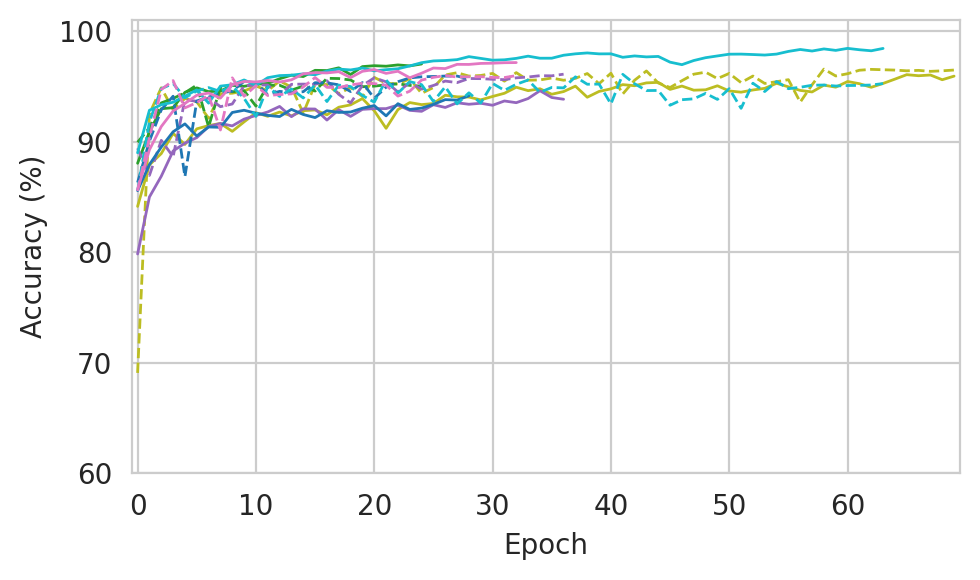

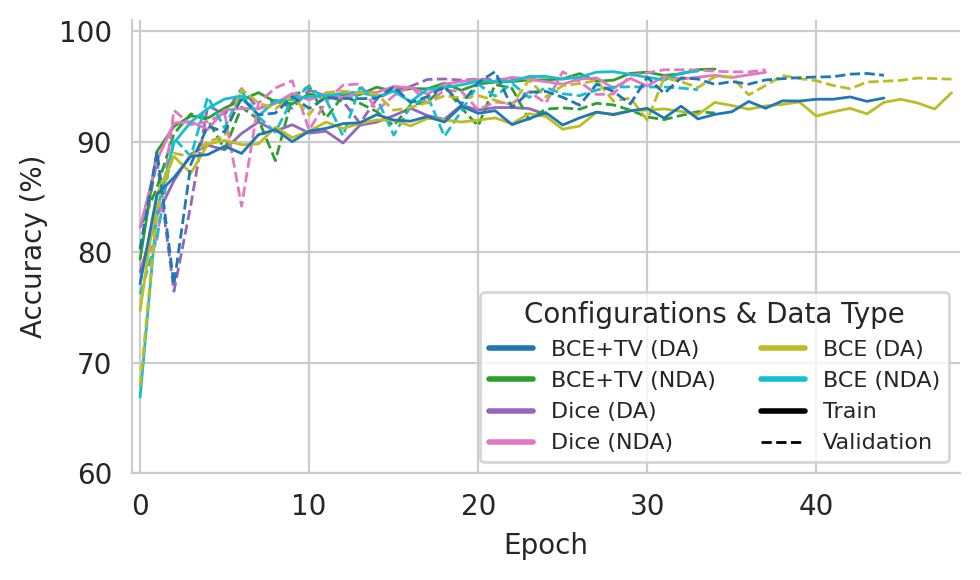

In [7]:
import matplotlib as mpl

# Generate a color map with distinct colors for different configurations
colors = mpl.cm.get_cmap('tab10')

configurations = ['BCE+TV (DA)', 'BCE+TV (NDA)', 'Dice (DA)', 'Dice (NDA)', 'BCE (DA)', 'BCE (NDA)']

# CNN Plot
fig1, ax1 = plt.subplots(figsize=(5, 3), tight_layout=True, dpi=200)
max_epoch_cnn = 0
for i, stat in enumerate(stats_list_cnn):
    color = colors(i)

    ax1.plot(np.array(stat['train_acc']) * 100, color=stat2color(stat), linewidth=1)
    ax1.plot(np.array(stat['val_acc']) * 100, color=stat2color(stat), linestyle='dashed', linewidth=1)
    
    max_epoch_cnn = max(stat['epoch'][-1], max_epoch_cnn)

ax1.set_xlim((-.5, max_epoch_cnn + .5))
ax1.set_ylim((60, 101))
ax1.set_ylabel('Accuracy (%)')
ax1.set_xlabel('Epoch')

# UNet Plot
fig2, ax2 = plt.subplots(figsize=(5, 3), tight_layout=True, dpi=200)
max_epoch_unet = 0
for i, stat in enumerate(stats_list_unet):
    color = colors(i)

    ax2.plot(np.array(stat['train_acc']) * 100, color=stat2color(stat), linewidth=1)
    ax2.plot(np.array(stat['val_acc']) * 100, color=stat2color(stat), linestyle='dashed', linewidth=1)
    
    max_epoch_unet = max(stat['epoch'][-1], max_epoch_unet)

ax2.set_xlim((-.5, max_epoch_unet + .5))
ax2.set_ylim((60, 101))
ax2.set_ylabel('Accuracy (%)')
ax2.set_xlabel('Epoch')

# Legend for line colors and styles
color_legend = [Line2D([0], [0], color=setting_colormap(i), lw=2) for i in range(len(configurations))]
style_legend = [Line2D([0], [0], color='black', lw=2), Line2D([0], [0], color='black', lw=1, linestyle='dashed')]
legends = color_legend + style_legend
legend_labels = configurations + ['Train', 'Validation']

ax2.legend(legends, legend_labels, loc='lower right', title='Configurations & Data Type', ncol=2, prop={'size':8})

sns.despine(top=True, right=True)
plt.tight_layout()
fig1.savefig('figs/ablation_skinlesion_cnn.png', bbox_inches='tight')
fig2.savefig('figs/ablation_skinlesion_unet.png', bbox_inches='tight')


# Test metrics
The following is the estimated performance on the test set of the best performing CNN and UNet model:

In [31]:
max_val_accuracy_cnn = 0
max_val_model_cnn = None

for stat in stats_list_cnn:
    if max(stat['val_acc']) > max_val_accuracy_cnn:
        max_val_accuracy_cnn = max(stat['val_acc'])
        max_val_model_cnn = stat

print(f"Model with highest validation accuracy for CNN: {max_val_model_cnn['loss_function']}, DA:{max_val_model_cnn['data_augmentation']} with accuracy {max_val_accuracy_cnn*100}%")


max_val_accuracy_unet = 0
max_val_model_unet = None

for stat in stats_list_unet:
    if max(stat['val_acc']) > max_val_accuracy_unet:
        max_val_accuracy_unet = max(stat['val_acc'])
        max_val_model_unet = stat

print(f"Model with highest validation accuracy for UNet: {max_val_model_unet['loss_function']}, DA:{max_val_model_unet['data_augmentation']} with accuracy {max_val_accuracy_unet*100}%")



Model with highest validation accuracy for CNN: bce_loss, DA:True with accuracy 96.56015038490295%
Model with highest validation accuracy for UNet: dice_loss, DA:False with accuracy 96.50517106056213%


Performance table

In [8]:
import pandas as pd
#!pip install tabulate
from tabulate import tabulate

# Metrics to include in the table
metrics = ['jaccard', 'dice', 'accuracy', 'precision', 'recall', 'specificity']

# Initialize a dictionary to store the performance metrics of each model
performance_metrics = {'Model': []}

for metric in metrics:
    performance_metrics[f'{metric} (mean ± CI)'] = []

# Models to compare
models = [max_val_model_cnn, max_val_model_unet]

for model in models:
    performance_metrics['Model'].append(model['model'])

    for metric in metrics:
        mean = model[metric]['mean']
        ci = model[metric]['conf_interval']
        performance_metrics[f'{metric} (mean ± CI)'].append(f'{mean:.3f} ± {ci:.3f}')

# Convert the dictionary to a DataFrame
df = pd.DataFrame(performance_metrics)

# Print the DataFrame as a pretty table
print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

NameError: name 'max_val_model_cnn' is not defined

In [ ]:
# Convert the DataFrame to LaTeX
latex_table = df.to_latex(index=False)

# Make the best performance bold
for metric in metrics:
    # Find the best performance
    best_performance = max(df[f'{metric} (mean ± CI)'], key=lambda x: float(x.split(' ± ')[0]))
    
    # Make the best performance bold in the LaTeX table
    latex_table = latex_table.replace(best_performance, '\\textbf{' + best_performance + '}')

print(latex_table)

In [ ]:
max_val_model_cnn['model_name'], max_val_model_unet['model_name']

/tmp/ipykernel_20634/3085318921.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = mpl.cm.get_cmap('tab10')


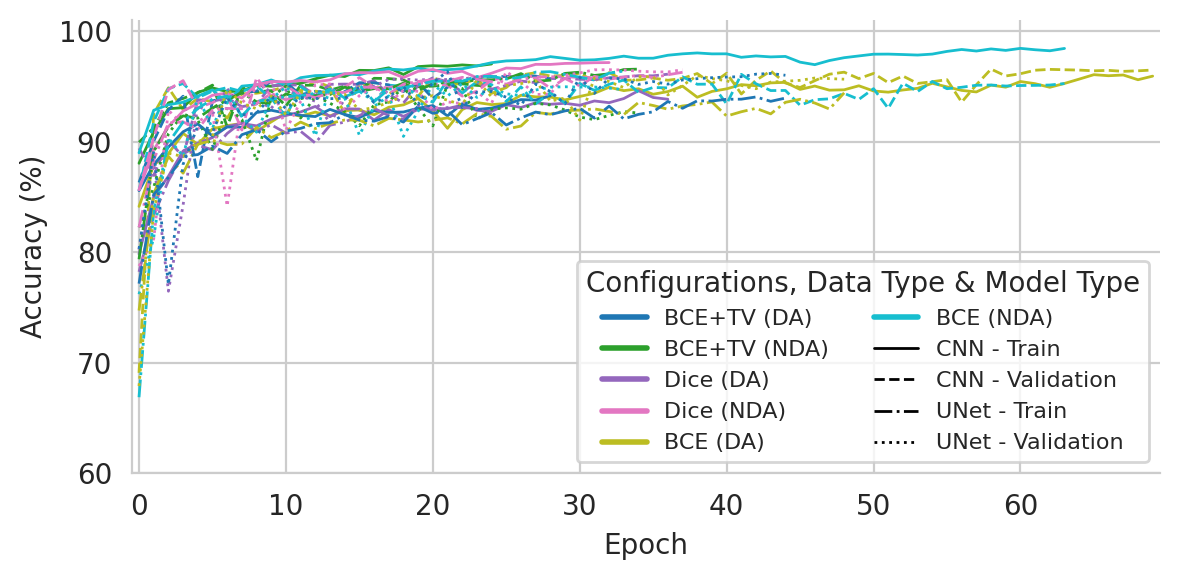

In [35]:
import matplotlib as mpl

# Generate a color map with distinct colors for different configurations
colors = mpl.cm.get_cmap('tab10')

configurations = ['BCE+TV (DA)', 'BCE+TV (NDA)', 'Dice (DA)', 'Dice (NDA)', 'BCE (DA)', 'BCE (NDA)']

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True, dpi=200)
max_epoch = 0
for i, stat in enumerate(stats_list_cnn + stats_list_unet):
    color = colors(i)

    if stat['model'] == 'cnn':
         linestyle_train = '-'
         linestyle_val = '--'
    else:  # 'unet'
        linestyle_train = '-.'
        linestyle_val = ':'

    ax.plot(np.array(stat['train_acc']) * 100, color=stat2color(stat),linestyle=linestyle_train, linewidth=1)
    ax.plot(np.array(stat['val_acc']) * 100, color=stat2color(stat), linestyle=linestyle_val, linewidth=1)
    
    max_epoch = max(stat['epoch'][-1], max_epoch)

ax.set_xlim((-.5, max_epoch + .5))
ax.set_ylim((60, 101))
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Epoch')

# Legend for line colors, line styles and marker types
color_legend = [Line2D([0], [0], color=setting_colormap(i), lw=2) for i in range(len(configurations))]
style_legend = [Line2D([0], [0], color='black', lw=1, linestyle='-'), Line2D([0], [0], color='black', lw=1, linestyle='--'), Line2D([0], [0], color='black', lw=1, linestyle='-.'), Line2D([0], [0], color='black', lw=1, linestyle=':')]
legends = color_legend + style_legend
legend_labels = configurations + ['CNN - Train', 'CNN - Validation', 'UNet - Train', 'UNet - Validation']

ax.legend(legends, legend_labels, loc='lower right', title='Configurations, Data Type & Model Type', ncol=2, prop={'size':8})

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('figs/ablation_skinlesion_combined.png', bbox_inches='tight') 